# Project: TMDB Movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data for this analysis is from the TMDB movie database. This is a community-built movie and TV database dating back to 2008. You can find more about TMDB by going to their website: https://www.themoviedb.org/

### Question(s) for Analysis
1. What are the most popular movie genre by year?
1. Who are the top 25 actors based on the movies they have starred in?

In [162]:
# Importing numpy, pandas, matplotlib and seaborn to help organize and visualize the data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

Importing tmdb-movies.csv and inspecting the data.

### General Properties

In [163]:
# Loading data and printing out a few lines.
df = pd.read_csv('tmdb-movies.csv')

In [164]:
# Inspecting for missing and errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Dataframe has two different id columns: id and imdb_id. 
Columns cast, genre and production_company have multiple values separated by pipe (|) characters.

In [165]:
# Checking data types and missing data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* There is missing data in columns: 
    1. cast 
    1. homepage 
    1. tagline 
    1. keywords 
    1. overview 
    1. genres
    1. production_companies.

Column revenue_adj will be changed to int datatype to be used later for analysis of actors and the revenue the movies they starred in.

I will now clean the data by deleting unneeded columns, converting datatypes, looking for duplicate rows, splitting columns with multiple values, and filling in missing data.

In [166]:
# Deleting columns that will not be needed for analysis: 
# imdb_id, homepage, tagline, keywords, overview, production_companies
df = pd.DataFrame (df, columns = ['popularity', 'original_title', 'cast', 'genres', 'vote_average', 'release_year', 'revenue_adj'])

In [167]:
# Converting revenue_adj and budget_adj to int datatype
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [168]:
# Creating a function to drop duplicate rows
def d(dataframe):
  dataframe.drop_duplicates(inplace= True)

In [169]:
# dropping duplicates
d(df)

In [170]:
# spliting columns with multiple values
df['cast'] = df['cast'].str.split('|')
df['genres'] = df['genres'].str.split('|')

In [171]:
# filling in missing data
df.fillna('', inplace=True) 

In [172]:
# Checking dataframe
df.info(26)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   cast            10865 non-null  object 
 3   genres          10865 non-null  object 
 4   vote_average    10865 non-null  float64
 5   release_year    10865 non-null  int64  
 6   revenue_adj     10865 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 679.1+ KB


All unneeded columns have been dropped and any rows missing data have been filled in. The datatype for revenue_adj was changed to int.

In [173]:
# Saving dataframe as a new csv file
df.to_csv('tmdb-movies-edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

## Determining the most popular genres by year:

There are multiple ways to analyze the most popular genres based on year. This could be done with movie count, popularity score, voting score, or a score including all three of these factors. 

Creating a list of the movie genres from the dataframe.

In [174]:
# Separating the genres column since there are multiple values on each row.
x = pd.DataFrame(df['genres'].tolist())
# Using concatenate to create one column with all movie genres.
df_g = pd.DataFrame(pd.concat([x[0], x[1], x[2], x[3], x[4]]))
# Renaming column
df_g.columns = ['genres']
# Adding a column to count each movie included for each genre
df_g['count'] = df_g.groupby(['genres'])['genres'].transform('count')

In [175]:
# Dropping duplicates
d(df_g)
# Sorting genre names
df_g = df_g.sort_values(by=['genres'])
# Setting genre names as index
df_g.set_index('genres')

,count
genres,
Action,2384.0
Adventure,1471.0
Animation,699.0
Comedy,3793.0
Crime,1354.0
Documentary,520.0
Drama,4760.0
Family,1231.0
Fantasy,916.0


The dataframe above shows all of the different genres included in the IMDB data set. Many movies include multiple genres. Genres such as Drama and Comedy have the most movies while Westerns and TV movies have the least amount of movies.

In [176]:
# Creating a dataframe to add a new row for every listed genre. 
df_t = pd.DataFrame()
# Using df_g genre index, looks for every instance of each genre and adds it to the dataframe.
# Since many movies included multiple genres, movies will be listed multiple times with column
# 'genre' listing each genre for that movie
for index, row in df_g.iterrows():
  x = df[df['genres'].str.contains(df_g['genres'].loc[index], regex=False) == True].copy()
  x['genre'] = df_g.loc[index,'genres'] 
  df_t = pd.concat([df_t,x])
# Removing unneeded columns
df_t = pd.DataFrame (df_t, columns = ['release_year', 'genre', 'original_title', 'popularity', 'vote_average'])

In [177]:
# Sorting dataframe and reviewing 
df_t = df_t.sort_values(by=['release_year', 'original_title'])
df_t.head()

,release_year,genre,original_title,popularity,vote_average
10169,1960,Horror,13 Ghosts,0.110511,5.5
10166,1960,Comedy,Carry On Constable,0.136525,6.0
10170,1960,Comedy,Cinderfella,0.055821,7.2
10170,1960,Romance,Cinderfella,0.055821,7.2
10156,1960,Action,Comanche Station,0.267118,6.5


You can see the difference in popularity and average voting scores. 

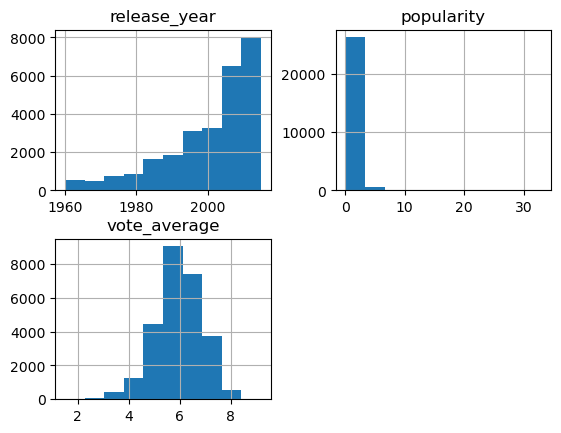

In [178]:
df_t.hist(grid=True);

When analysing the data, it appears there may be some outliers in popularity. The majority of IMDB popularity scores are between 0-10. There are a lot more movies in the dataframe in the past 10 years according to the release year information. Vote average may possibly have some movies that arent scored.

In [179]:
# Investigating popularity column
df_t.nlargest(10, 'popularity')

,release_year,genre,original_title,popularity,vote_average
0,2015,Action,Jurassic World,32.985763,6.5
0,2015,Adventure,Jurassic World,32.985763,6.5
0,2015,Science Fiction,Jurassic World,32.985763,6.5
0,2015,Thriller,Jurassic World,32.985763,6.5
1,2015,Action,Mad Max: Fury Road,28.419936,7.1
1,2015,Adventure,Mad Max: Fury Road,28.419936,7.1
1,2015,Science Fiction,Mad Max: Fury Road,28.419936,7.1
1,2015,Thriller,Mad Max: Fury Road,28.419936,7.1
629,2014,Adventure,Interstellar,24.949134,8.0
629,2014,Drama,Interstellar,24.949134,8.0


In [180]:
# Investigating popularity column
df_t.nsmallest(10, 'vote_average')

,release_year,genre,original_title,popularity,vote_average
10865,1966,Horror,Manos: The Hands of Fate,0.035919,1.5
7772,2007,Action,Transmorphers,0.121120,1.5
7772,2007,Adventure,Transmorphers,0.121120,1.5
7772,2007,Science Fiction,Transmorphers,0.121120,1.5
4882,2012,Action,Jurassic Shark,0.079281,2.0
4882,2012,Horror,Jurassic Shark,0.079281,2.0
4882,2012,Science Fiction,Jurassic Shark,0.079281,2.0
7220,2004,Comedy,Superbabies: Baby Geniuses 2,0.157959,2.1
7220,2004,Family,Superbabies: Baby Geniuses 2,0.157959,2.1
2373,2010,Horror,Birdemic: Shock and Terror,0.150035,2.1


All movies have votes, the lowest being 1.5

The above investigation shows some newer movies have a much higher IMDB popularity score. This may be die to the fact that the score is based on an algorithm that calculates factors such as pageclicks. Newer movies will have a higher score since they are more currently relevant. 

In [181]:
# Creating a function for a scatterplot to be used throughout the analysis
def sch(dataframe):
# Sorting data by top genre    
  dataframe = dataframe.sort_values(by=['top_genre'], ascending=False)
# Resizing scatterplot to fit every year
  plt.figure(figsize=(13,4))
# scatterplot using release year and top genre with a colormap for each plot   
  plt.scatter(dataframe.release_year, dataframe.top_genre); 
# title of scatterplot
  plt.title('Most popular genre each year')
# X axis label
  plt.xlabel('Year')
# Y axis label
  plt.ylabel('Genre')
# Adding grid to clearly show each top genre by year  
  plt.grid()
# Including each year on X axis   
  plt.xticks(np.arange(1960, 2016, step=1), rotation=90) 

### Popular genre based on the number of movies made in each genre each year

The number of movies made in each genre per year cannot determine the most popular genre alone because some genres are very broad such as drama and comedy. This analysis will help when all three factors are combined. 

In [182]:
# Creating a column for the movie count grouped by year and genre
df_t["genre_count"] = df_t.groupby(['release_year', 'genre'])['genre'].transform('count')
# This will be used to find the top genre for each year determined by the max movie count grouped by year.
df_t["genre_max"] = df_t.groupby(['release_year'])['genre_count'].transform('max')
df_t

,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max
10169,1960,Horror,13 Ghosts,0.110511,5.5,7,13
10166,1960,Comedy,Carry On Constable,0.136525,6.0,8,13
10170,1960,Comedy,Cinderfella,0.055821,7.2,8,13
10170,1960,Romance,Cinderfella,0.055821,7.2,6,13
10156,1960,Action,Comanche Station,0.267118,6.5,8,13
...,...,...,...,...,...,...,...
139,2015,Thriller,Z for Zachariah,1.161812,5.5,171,260
336,2015,Drama,Zipper,0.357567,5.5,260,260
336,2015,Thriller,Zipper,0.357567,5.5,171,260
471,2015,Crime,è§£æ•‘å´å…ˆç”Ÿ,0.197239,6.4,51,260


In [183]:
# Dataframe for finding the most popular genre for each year determined by the number of movies made in that genre
df_c = pd.DataFrame (df_t, columns = ['release_year', 'genre', 'genre_count', 'genre_max']).copy()
# Removing all rows except the top genre for each year with the top movie title
df_c = df_c[df_c['genre_count'] == df_c['genre_max']]
# Removing unneeded columns
df_c = pd.DataFrame (df_c, columns = ['release_year', 'genre', 'genre_count'])
# Dropping duplicates
d(df_c)
# Renaming columns
df_c.columns = ['release_year', 'top_genre', 'genre_count' ]
# Resetting index
df_c = df_c.reset_index(drop=True)
df_c

,release_year,top_genre,genre_count
0,1960,Drama,13
1,1961,Drama,16
2,1962,Drama,21
3,1963,Drama,13
4,1963,Comedy,13
5,1964,Drama,20
6,1965,Drama,20
7,1966,Drama,16
8,1966,Comedy,16
9,1967,Comedy,17


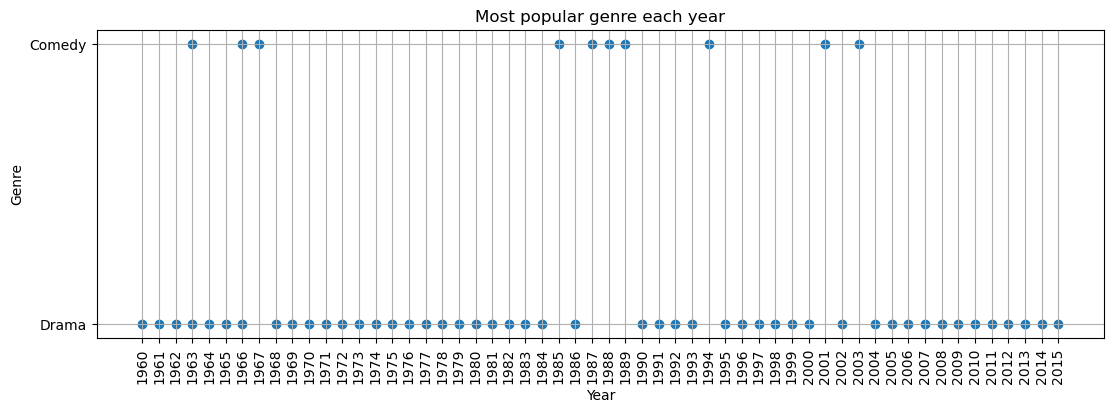

In [184]:
# Scatter chart showing top genre for each year based on popularity IMDB score
sch(df_c)

Comedies and Drama are the top produced movies throughout the timeframe. We cannot come to any other conclusion without factoring in popularity and voting averages.

### Popular genre based on IMDB popularity score:

The popularity score from IMDB is calculated using many factors such as page clicks in a certain time frame. This means the score changes often and may not accurately reflect the popularity of movies throughout time.

In [185]:
# Creating a column for the popularity mean grouped by year and genre
df_t["mean_pop"] = df_t.groupby(['release_year', 'genre'])['popularity'].transform('mean')
# Creating a column for the popularity max mean grouped by year
# This will be used to find the top genre for each year determined by the max popularity mean grouped by year.
df_t["max_pop"] = df_t.groupby(['release_year'])['mean_pop'].transform('max')
df_t

,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max,mean_pop,max_pop
10169,1960,Horror,13 Ghosts,0.110511,5.5,7,13,0.591450,0.811910
10166,1960,Comedy,Carry On Constable,0.136525,6.0,8,13,0.396000,0.811910
10170,1960,Comedy,Cinderfella,0.055821,7.2,8,13,0.396000,0.811910
10170,1960,Romance,Cinderfella,0.055821,7.2,6,13,0.541228,0.811910
10156,1960,Action,Comanche Station,0.267118,6.5,8,13,0.590724,0.811910
...,...,...,...,...,...,...,...,...,...
139,2015,Thriller,Z for Zachariah,1.161812,5.5,171,260,1.401877,3.283786
336,2015,Drama,Zipper,0.357567,5.5,260,260,0.937877,3.283786
336,2015,Thriller,Zipper,0.357567,5.5,171,260,1.401877,3.283786
471,2015,Crime,è§£æ•‘å´å…ˆç”Ÿ,0.197239,6.4,51,260,1.722032,3.283786


In [186]:
# Dataframe for finding the most popular genre for each year determined by IMDB popularity score
df_p = pd.DataFrame (df_t, columns = ['release_year', 'genre', 'original_title', 'popularity', 'mean_pop', 'max_pop']).copy()
# Removing all rows except for the max popularity mean for each year.
df_p = df_p[df_p['mean_pop'] == df_p['max_pop']]
# Updating 'max_pop' column with max popularity to find most popular movie title in the top genre for each year.
df_p["max_pop"] = df_p.groupby(['release_year'])['popularity'].transform('max')
# Removing all rows except the top genre for each year with the top movie title
df_p = df_p[df_p['popularity'] == df_p['max_pop']]
# Removing unneeded columns
df_p = pd.DataFrame (df_p, columns = ['release_year', 'genre', 'original_title', 'mean_pop'])
# Renaming columns
df_p.columns = ['release_year', 'top_genre', 'top_movie', 'mean_popularity' ]
# Resetting index
df_p = df_p.reset_index(drop=True)
df_p

,release_year,top_genre,top_movie,mean_popularity
0,1960,Thriller,Psycho,0.811910
1,1961,Animation,One Hundred and One Dalmatians,2.631987
2,1962,Adventure,Dr. No,0.942513
3,1963,Animation,The Sword in the Stone,2.180410
4,1964,War,Dr. Strangelove or: How I Learned to Stop Worr...,0.930959
5,1965,Music,The Sound of Music,0.968850
6,1966,Animation,How the Grinch Stole Christmas!,0.585717
7,1967,Animation,The Jungle Book,1.348805
8,1968,Mystery,2001: A Space Odyssey,1.519456
9,1969,Crime,Butch Cassidy and the Sundance Kid,0.948020


The dataframe above shows the top genre for each year based on IMDB popularity scores as well as the top movie titles 
in the genre for that particular year. Many of the movies listed are still popular today such as Psycho from 1960. It appears that there are two top genres in 1971 with the same movie: Willy Wonka and the Chocolate Factory. I will investigate these results.

In [187]:
# Filtering by year 1971 and Genres Family and Fantasy
display(df_t.query('release_year  == 1971 & genre.str.startswith("F").values'))

,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max,mean_pop,max_pop
9931,1971,Family,Bedknobs and Broomsticks,0.630778,6.6,2,30,1.530722,1.530722
9931,1971,Fantasy,Bedknobs and Broomsticks,0.630778,6.6,2,30,1.530722,1.530722
9924,1971,Family,Willy Wonka & the Chocolate Factory,2.430667,7.2,2,30,1.530722,1.530722
9924,1971,Fantasy,Willy Wonka & the Chocolate Factory,2.430667,7.2,2,30,1.530722,1.530722


Both genres include the same two movies so they have the same IMDB popularity score.

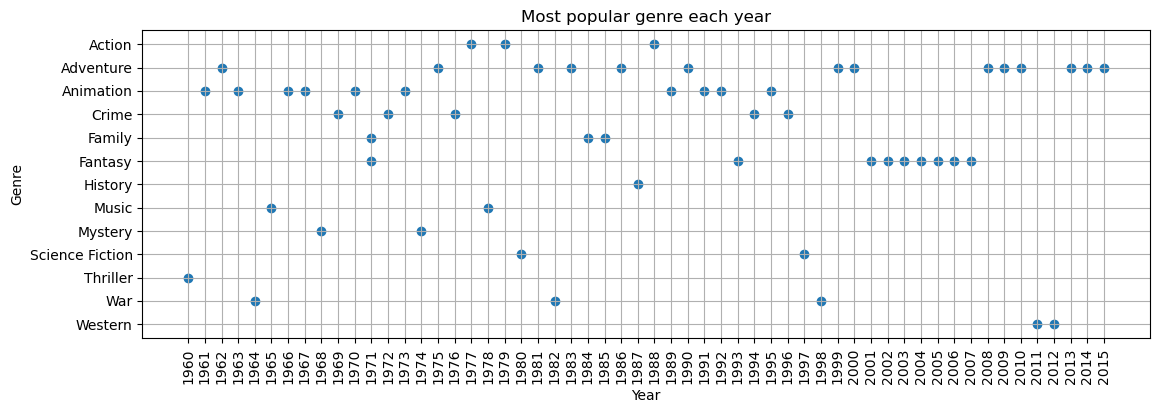

In [188]:
# Scatter chart showing top genre for each year based on popularity IMDB score
sch(df_p)

Using the IMDB popularity score shows the top genres as Adventure, Animation and Fantasy over the years. Since the IMDB popularity score is determined by current interest, these results may not reflect accurate genre popularity at the time the movies were released.

### Popular genre based on IMDB voting averages:
The voting average is based on user votes on the IMDB website. While this score does not change as often as the popularity, it is still based on current preferences, rather than the popularity when the movies were originally released.

In [189]:
# Creating a column for the voting average mean grouped by year and genre
df_t["mean_vote"] = df_t.groupby(['release_year', 'genre'])['vote_average'].transform('mean')
# Creating a column for the voting average max mean grouped by year
# This will be used to find the top genre for each year determined by the max voting average mean grouped by year.
df_t["max_vote"] = df_t.groupby(['release_year'])['mean_vote'].transform('max')

In [190]:
# Dataframe for finding the most popular genre for each year determined by IMDB voting average
df_v = pd.DataFrame (df_t, columns = ['release_year', 'genre', 'original_title', 'vote_average', 'mean_vote', 'max_vote']).copy()
# Removing all rows except for the max voting average mean for each year.
df_v = df_v[df_v['mean_vote'] == df_v['max_vote']]
# Updating 'max_vote' column with max voting average to find most popular movie title in the top genre for each year.
df_v["max_vote"] = df_v.groupby(['release_year'])['vote_average'].transform('max')
# Removing all rows except the top genre for each year with the top movie title
df_v = df_v[df_v['vote_average'] == df_v['max_vote']]
# Removing unneeded columns
df_v = pd.DataFrame (df_v, columns = ['release_year', 'genre', 'original_title', 'mean_vote'])
# Renaming columns
df_v.columns = ['release_year', 'top_genre', 'top_movie', 'mean_vote' ]
# Resetting index
df_v = df_v.reset_index(drop=True)
df_v

,release_year,top_genre,top_movie,mean_vote
0,1960,Family,Pollyanna,7.033333
1,1961,War,The Guns of Navarone,6.800000
2,1962,Western,Ride the High Country,6.833333
3,1963,War,The Great Escape,7.500000
4,1964,War,Dr. Strangelove or: How I Learned to Stop Worr...,7.033333
5,1965,Animation,A Charlie Brown Christmas,7.600000
6,1965,TV Movie,A Charlie Brown Christmas,7.600000
7,1966,Documentary,The Endless Summer,7.400000
8,1967,War,The Dirty Dozen,7.200000
9,1968,Mystery,2001: A Space Odyssey,7.200000


The dataframe above shows the top genre for each year based on IMDB voting averages as well as the top movie titles 
in the genre for that particular year. Many of the movies listed are still popular today such as Pollyanna from 1960. There are duplicate genres shown for 1965 and 1971 again. 1973 Shows two movies as the top movie in comedy. I will investigate these years.

In [191]:
# Filtering by year 1965 and Genres Animation and TV movie
display(df_t.query('release_year  == 1965 & genre.str.startswith("TV").values'), 
        df_t.query('release_year  == 1965 & genre.str.startswith("Animation").values'))

,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max,mean_pop,max_pop,mean_vote,max_vote
10693,1965,TV Movie,A Charlie Brown Christmas,0.600975,7.6,1,20,0.600975,0.96885,7.6,7.6


,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max,mean_pop,max_pop,mean_vote,max_vote
10693,1965,Animation,A Charlie Brown Christmas,0.600975,7.6,1,20,0.600975,0.96885,7.6,7.6


Both genres include the same movie so they have the same IMDB vote average.

In [192]:
# Filtering by year 1971 and Genres Family and Fantasy
display(df_t.query('release_year  == 1971 & genre.str.startswith("F").values'))

,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max,mean_pop,max_pop,mean_vote,max_vote
9931,1971,Family,Bedknobs and Broomsticks,0.630778,6.6,2,30,1.530722,1.530722,6.9,6.9
9931,1971,Fantasy,Bedknobs and Broomsticks,0.630778,6.6,2,30,1.530722,1.530722,6.9,6.9
9924,1971,Family,Willy Wonka & the Chocolate Factory,2.430667,7.2,2,30,1.530722,1.530722,6.9,6.9
9924,1971,Fantasy,Willy Wonka & the Chocolate Factory,2.430667,7.2,2,30,1.530722,1.530722,6.9,6.9


Both genres include the same two movies so they have the same IMDB vote average.

In [193]:
# Filtering by year 1971 and Genres Comedy
display(df_t.query('release_year  == 1973 & genre.str.startswith("Comedy").values'))

,release_year,genre,original_title,popularity,vote_average,genre_count,genre_max,mean_pop,max_pop,mean_vote,max_vote
10627,1973,Comedy,A Charlie Brown Thanksgiving,0.238043,7.6,8,31,0.436991,0.956526,7.125,7.125
10606,1973,Comedy,American Graffiti,0.684079,6.5,8,31,0.436991,0.956526,7.125,7.125
10613,1973,Comedy,Paper Moon,0.419331,7.7,8,31,0.436991,0.956526,7.125,7.125
10609,1973,Comedy,Sleeper,0.568400,6.9,8,31,0.436991,0.956526,7.125,7.125
10619,1973,Comedy,The Last Detail,0.240731,6.8,8,31,0.436991,0.956526,7.125,7.125
10601,1973,Comedy,The Sting,0.863156,7.7,8,31,0.436991,0.956526,7.125,7.125
10614,1973,Comedy,The Three Musketeers,0.412189,7.0,8,31,0.436991,0.956526,7.125,7.125
10646,1973,Comedy,Theatre of Blood,0.069999,6.8,8,31,0.436991,0.956526,7.125,7.125


The top movies in this genre have the same Voting score of 7.7 so they tie for top movie in Comedy for 1973.

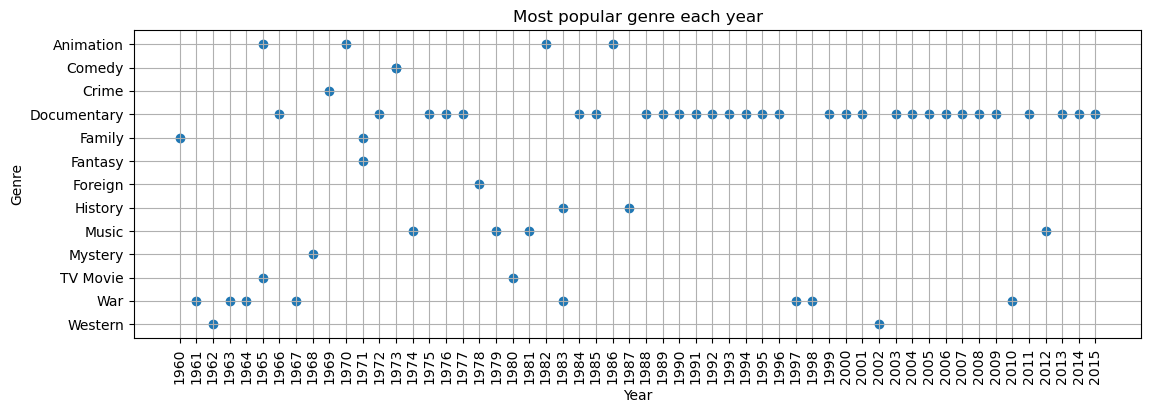

In [194]:
# Scatter chart showing top genre for each year based on voting average
sch(df_v) 

Using the voting average gives very different top genres for each year. Documentaries seem to have the highest voting averages for many of the years. This may mean that more people are voting on documentary movies than on other genres.

### Popular genre based on movie count, popularity score and voting averages:
We may be able to get a more accurate determination on top genres if we rank and combine Movie count, IMDB popularity score and voting averages.  

In [195]:
# Removing unneeded columns
df_t = pd.DataFrame (df_t, columns = ['release_year', 'genre','genre_count', 'mean_pop', 'mean_vote']).copy()
# Dropping duplicates
d(df_t)
# Ranking movie count, popularity and voting score based on year and genre
df_t['count_rank'] = df_t.groupby(['release_year'])['genre_count'].rank(ascending = 1)
df_t['popularity_rank'] = df_t.groupby(['release_year'])['mean_pop'].rank(ascending = 1) 
df_t['vote_rank'] = df_t.groupby(['release_year'])['mean_vote'].rank(ascending = 1)
df_t

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank
10169,1960,Horror,7,0.591450,6.642857,13.0,14.0,11.0
10166,1960,Comedy,8,0.396000,6.312500,14.5,6.0,8.0
10170,1960,Romance,6,0.541228,6.350000,11.0,10.0,9.0
10156,1960,Action,8,0.590724,6.050000,14.5,13.0,5.0
10156,1960,Western,6,0.567759,5.950000,11.0,12.0,4.0
...,...,...,...,...,...,...,...,...
95,2015,Animation,39,1.146298,6.492308,7.0,9.0,17.0
303,2015,Fantasy,33,1.740228,5.915152,5.5,15.0,6.0
396,2015,History,15,1.007905,6.513333,3.0,8.0,18.0
291,2015,War,9,1.284511,6.222222,2.0,11.0,13.0


The dataframe above shows the genre rank of each variable determined by year. When we add these rank scores together, we will have a better indication of what genre is the most popular each year

In [196]:
# Creating a column for combining the popularity and voting average
df_t["combined"] = df_t['count_rank'] + df_t['popularity_rank'] + (df_t['vote_rank'])
# This will be used to find the top genre for each year determined by the max combined mean grouped by year.
df_t["max_combined"] = df_t.groupby(['release_year'])['combined'].transform('max')
df_t.head(20)

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
10169,1960,Horror,7,0.591450,6.642857,13.0,14.0,11.0,38.0,42.0
10166,1960,Comedy,8,0.396000,6.312500,14.5,6.0,8.0,28.5,42.0
10170,1960,Romance,6,0.541228,6.350000,11.0,10.0,9.0,30.0,42.0
10156,1960,Action,8,0.590724,6.050000,14.5,13.0,5.0,32.5,42.0
10156,1960,Western,6,0.567759,5.950000,11.0,12.0,4.0,27.0,42.0
10165,1960,Drama,13,0.566305,6.276923,16.0,11.0,7.0,34.0,42.0
10172,1960,History,5,0.412364,6.180000,8.5,7.0,6.0,21.5,42.0
10172,1960,War,2,0.225863,5.500000,4.0,2.0,2.0,8.0,42.0
10153,1960,Thriller,6,0.811910,6.816667,11.0,16.0,15.0,42.0,42.0
10149,1960,Crime,2,0.346479,5.900000,4.0,5.0,3.0,12.0,42.0


Combining ranking scores and getting the top combined score for each year. this will be used to find the most popular genre.

In [197]:
# Dataframe for finding the most popular genre for each year determined by IMDB popularity score and voting average
df_c = pd.DataFrame (df_t, columns = ['release_year', 'genre', 'combined', 'max_combined']).copy()
# Removing all rows except for the max combined mean for each year.
df_c = df_c[df_c['combined'] == df_c['max_combined']]
# Removing all rows except the top genre for each year with the top movie title
df_c = df_c[df_c['combined'] == df_c['max_combined']]
# Removing unneeded columns
df_c = pd.DataFrame (df_c, columns = ['release_year', 'genre'])
# Renaming columns
df_c.columns = ['release_year', 'top_genre']
# Resetting index
df_c = df_c.reset_index(drop=True)
df_c.head(60)

,release_year,top_genre
0,1960,Thriller
1,1961,Comedy
2,1962,Thriller
3,1963,Adventure
4,1964,Thriller
5,1965,Family
6,1966,Family
7,1967,Drama
8,1967,Crime
9,1968,Adventure


These results combine all three factors. There are a few years with genres that tie for most popular. This could be avoided if we created an algorithm that gave one of the factors most precedence than the others. I will investigate the years listed more than once.

In [198]:
# Filtering by year 1967 and Genres Drama and Crime 
display(df_t.query('release_year  == 1967 & genre.str.startswith("Drama").values'), 
        df_t.query('release_year  == 1967 & genre.str.startswith("Crime").values'))

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
10403,1967,Drama,16,0.511467,6.74375,16.0,11.0,14.0,41.0,41.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
10402,1967,Crime,7,0.538359,7.0,13.0,12.0,16.0,41.0,41.0


These two genres tied for top genre of 1967. When analyzing these genres, we can see they have the same combined score. Drama had more movies made but is less popular and had lower voting scores

In [199]:
# Filtering by year 1980 and Genres Science Fiction, Drama and Action 
display(df_t.query('release_year  == 1980 & genre.str.startswith("Drama").values'), 
        df_t.query('release_year  == 1980 & genre.str.startswith("Science").values'),
        df_t.query('release_year  == 1980 & genre.str.startswith("Action").values'))

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
7343,1980,Drama,32,0.37468,6.228125,18.0,8.0,13.0,39.0,39.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
7350,1980,Science Fiction,11,0.897143,6.081818,12.0,18.0,9.0,39.0,39.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
7340,1980,Action,27,0.594729,6.018519,17.0,15.0,7.0,39.0,39.0


These three genres tied for top genre of 1980. When analyzing these genres, we can see they have the same combined score. Drama had more movies made, followed by Action. Science Fiction has the highest popularity and Drama is Highest in Voting scores.

In [200]:
# Filtering by year 1984 and Genres Family and Action 
display(df_t.query('release_year  == 1984 & genre.str.startswith("Family").values'), 
        df_t.query('release_year  == 1984 & genre.str.startswith("Action").values'))

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
7917,1984,Family,9,0.823924,6.4,7.0,18.0,14.0,39.0,39.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
7931,1984,Action,33,0.764616,5.869697,16.0,16.0,7.0,39.0,39.0


These two genres tied for top genre of 1984. When analyzing these genres, we can see they have the same combined score. Action had more movies made but is less popular and had lower voting scores

In [201]:
# Filtering by year 1985 and Genres Family and Comedy 
display(df_t.query('release_year  == 1985 & genre.str.startswith("Family").values'), 
        df_t.query('release_year  == 1985 & genre.str.startswith("Comedy").values'))

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
6141,1985,Family,12,0.924311,6.458333,8.0,18.0,15.0,41.0,41.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
6188,1985,Comedy,51,0.624652,6.192157,18.0,13.0,10.0,41.0,41.0


These two genres tied for top genre of 1985. When analyzing these genres, we can see they have the same combined score. Comedy had more movies made but is less popular and had lower voting scores

In [202]:
# Filtering by year 1989 and Genres Family and Animation 
display(df_t.query('release_year  == 1989 & genre.str.startswith("Family").values'), 
        df_t.query('release_year  == 1989 & genre.str.startswith("Animation").values'))

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
9226,1989,Family,17,0.918915,6.347059,10.0,18.0,13.0,41.0,41.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
9226,1989,Animation,5,1.177585,6.82,7.0,19.0,15.0,41.0,41.0


These two genres tied for top genre of 1989. When analyzing these genres, we can see they have the same combined score. Family had more movies made but is less popular and had lower voting scores

In [203]:
# Filtering by year 1994 and Genres Crime and Drama 
display(df_t.query('release_year  == 1994 & genre.str.startswith("Crime").values'), 
        df_t.query('release_year  == 1994 & genre.str.startswith("Drama").values'))

,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
4242,1994,Crime,26,1.297888,6.196154,13.0,20.0,14.0,47.0,47.0


,release_year,genre,genre_count,mean_pop,mean_vote,count_rank,popularity_rank,vote_rank,combined,max_combined
4332,1994,Drama,83,0.721422,6.126506,19.0,15.0,13.0,47.0,47.0


These two genres tied for top genre of 1994. When analyzing these genres, we can see they have the same combined score. Drama had more movies made but is less popular and had lower voting scores

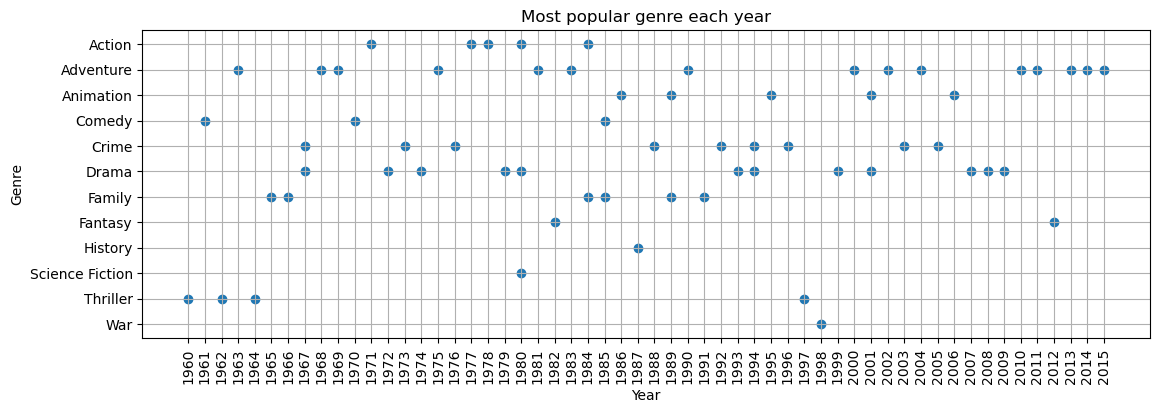

In [204]:
# Scatter chart showing top genre for each year based on popularity IMDB score and voting average combined
sch(df_c)

When we use the combined rankings of movie count, popularity and voting average, we get the most accurate depiction of the most popular genres over the years.

## Conclusions:
All four calculations give completely different results. My conclusion is that combining movie count, voting average and IMDB popularity scores, we will get the most accurate analysis since the IMDB popularity score is based on current interest in movies and not the popularity over time. The voting average doesn't accurately give popularity on its own because popular movies are likely to have more votes and some of those votes could bring down the average. Both scores are based on current interest in movies so the older the movies are, the less likely they will have high popularity scores and voting averages. We need movie count since both IMDB popularity and Voting avergae are based on the movies and are current popularity. The number of movies made in each genre each year gives a better idea of what was popular at the time.

## Greatest actors based on number of movies, revenue and popularity

Finding the greatest actors based on how many movies they have starred in, the total revenue the movies made and the popularity of the movies.

In [205]:
# Separating the cast column since there are multiple values on each row.
x = pd.DataFrame(df['cast'].tolist())
# Using concatenate to create one column with all the actor's names.
df_a = pd.DataFrame(pd.concat([x[0], x[1], x[2], x[3], x[4]]))
# Renaming column
df_a.columns = ['actor']
# Adding a column that will be used to count the number of movies each actor starred in
df_a['count'] = 0

In [206]:
# Calculating the number of movies each actor starred in 
df_a['count'] = df_a.groupby(['actor'])['count'].transform('count')

In [207]:
# Dropping duplicates
d(df_a)
# Sorting by movie count
df_a = df_a.sort_values(by=['count'], ascending=False)
# Removing all but the top 200 actors based on number of movies they have starred in
df_a = df_a.nlargest(200, 'count')
# Resetting index
df_a = df_a.reset_index(drop=True)
df_a

,actor,count
0,Robert De Niro,72.0
1,Samuel L. Jackson,71.0
2,Bruce Willis,62.0
3,Nicolas Cage,61.0
4,Michael Caine,53.0
...,...,...
195,Jamie Lee Curtis,25.0
196,Jodie Foster,25.0
197,Kim Basinger,25.0
198,Maria Bello,25.0


The dataframe above shows the top 200 actors based on the number of movies they have starred in. Many of the top actors based on the number of movies they made have probably been acting for longer than the actors with less movies. While these results show actor's experience, it does not reflect how popular the movies they starred in actually are.

To get more accurate results, I will use movie revenue, popularity and voting average to find the actors who were in the most popular movies in our data set. 

In [208]:
# Creating a new dataframe for the movie data on the top 100 actorsb
df_t = pd.DataFrame()
# Using df_a actor index, looks for every instance of each actor and adds row to the dataframe.
# Since many movies included multiple actors, movies will be listed multiple times with column
# Adding new 'actor' column for each actor listed
for index, row in df_a.iterrows():
  x = df[df['cast'].str.contains(df_a['actor'].loc[index], regex=False) == True].copy()
  x['actor'] = df_a.loc[index,'actor'] 
  x['movie_count'] = df_a.loc[index,'count']  
  df_t = pd.concat([df_t,x])
df_t    

,popularity,original_title,cast,genres,vote_average,release_year,revenue_adj,actor,movie_count
51,2.814802,The Intern,"[Robert De Niro, Anne Hathaway, Rene Russo, An...",[Comedy],7.1,2015,178999419,Robert De Niro,72.0
53,2.793297,Joy,"[Jennifer Lawrence, Bradley Cooper, Robert De ...","[Comedy, Drama]",6.4,2015,93043293,Robert De Niro,72.0
109,1.449072,Heist,"[Jeffrey Dean Morgan, Robert De Niro, Kate Bos...","[Crime, Action, Thriller]",5.4,2015,46125,Robert De Niro,72.0
494,0.129455,Ellis,[Robert De Niro],[Drama],7.2,2015,0,Robert De Niro,72.0
572,0.082569,The Audition,"[Leonardo DiCaprio, Brad Pitt, Robert De Niro,...",[Comedy],6.1,2015,0,Robert De Niro,72.0
...,...,...,...,...,...,...,...,...,...
6555,4.205992,Pirates of the Caribbean: Dead Man's Chest,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",6.8,2006,1152691351,Keira Knightley,25.0
7023,1.062180,King Arthur,"[Clive Owen, Ioan Gruffudd, Keira Knightley, M...","[Adventure, War, History]",6.1,2004,235007976,Keira Knightley,25.0
7387,4.965391,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Adventure, Fantasy, Action]",6.8,2007,1010653507,Keira Knightley,25.0
7406,2.066397,Atonement,"[Keira Knightley, James McAvoy, Romola Garai, ...","[Drama, Romance]",7.2,2007,135945055,Keira Knightley,25.0


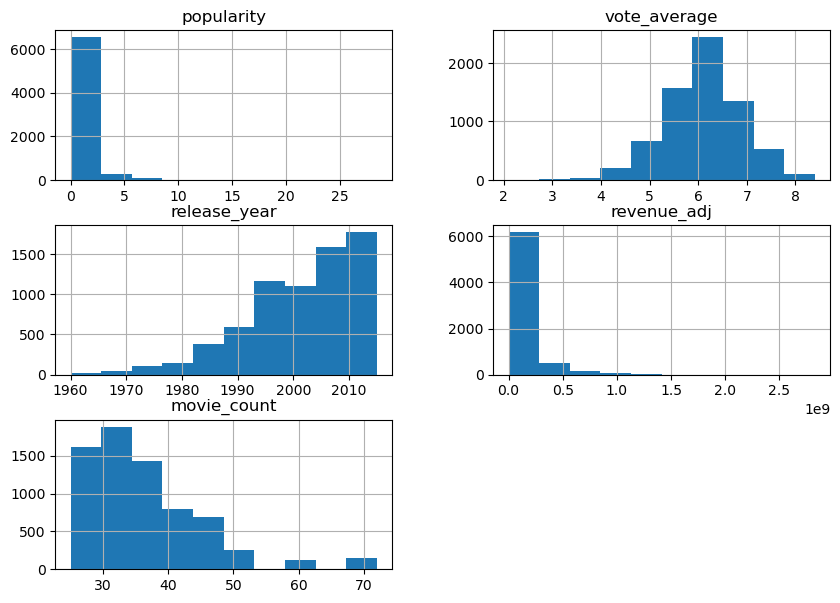

In [209]:
df_t.hist(figsize=(10,7));

The histogram shows all of the movies the top 200 actors have starred in. I will investigate revenue adj for any outliers.

In [210]:
# Investigating revenue column
df_t.nlargest(10, 'revenue_adj')

,popularity,original_title,cast,genres,vote_average,release_year,revenue_adj,actor,movie_count
1386,9.432768,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Action, Adventure, Fantasy, Science Fiction]",7.1,2009,2827123750,Sigourney Weaver,33.0
1329,12.037933,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...","[Adventure, Action, Science Fiction]",7.9,1977,2789712242,Harrison Ford,42.0
5231,4.355219,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...","[Drama, Romance, Thriller]",7.3,1997,2506405735,Kate Winslet,31.0
5231,4.355219,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...","[Drama, Romance, Thriller]",7.3,1997,2506405735,Leonardo DiCaprio,30.0
3,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1902723129,Harrison Ford,42.0
8889,2.900556,E.T. the Extra-Terrestrial,"[Henry Thomas, Drew Barrymore, Robert MacNaugh...","[Science Fiction, Adventure, Family, Fantasy]",7.2,1982,1791694309,Drew Barrymore,34.0
8094,1.136610,The Net,"[Sandra Bullock, Jeremy Northam, Dennis Miller...","[Crime, Drama, Mystery, Thriller, Action]",5.6,1995,1583049536,Sandra Bullock,34.0
4361,7.637767,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Science Fiction, Action, Adventure]",7.3,2012,1443191435,Robert Downey Jr.,43.0
4361,7.637767,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Science Fiction, Action, Adventure]",7.3,2012,1443191435,Scarlett Johansson,32.0
4361,7.637767,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Science Fiction, Action, Adventure]",7.3,2012,1443191435,Mark Ruffalo,28.0


The largest revenue adj amounts look like they are accurate.

In [211]:
# Investigating revenue column for movies with 0 adusted revenue
df_t[df_t['revenue_adj'] == 0]

,popularity,original_title,cast,genres,vote_average,release_year,revenue_adj,actor,movie_count
494,0.129455,Ellis,[Robert De Niro],[Drama],7.2,2015,0,Robert De Niro,72.0
572,0.082569,The Audition,"[Leonardo DiCaprio, Brad Pitt, Robert De Niro,...",[Comedy],6.1,2015,0,Robert De Niro,72.0
1346,0.434509,"New York, New York","[Liza Minnelli, Robert De Niro, Lionel Stander...","[Drama, Music, Romance]",5.6,1977,0,Robert De Niro,72.0
1771,0.230953,Everybody's Fine,"[Robert De Niro, Drew Barrymore, Kate Beckinsa...",[Drama],6.5,2009,0,Robert De Niro,72.0
4043,0.446326,Analyze That,"[Robert De Niro, Billy Crystal, Lisa Kudrow, J...","[Comedy, Crime]",5.8,2002,0,Robert De Niro,72.0
...,...,...,...,...,...,...,...,...,...
2776,0.318067,Princess of Thieves,"[Keira Knightley, David Barrass, Malcolm McDow...","[Action, Family, Adventure, Romance, TV Movie]",5.7,2001,0,Keira Knightley,25.0
2966,0.857292,The Duchess,"[Keira Knightley, Ralph Fiennes, Aidan McArdle...","[Drama, History, Romance]",6.6,2008,0,Keira Knightley,25.0
3178,0.282162,The Edge of Love,"[Keira Knightley, Cillian Murphy, Sienna Mille...","[Drama, History, Romance]",6.3,2008,0,Keira Knightley,25.0
4084,0.306821,Doctor Zhivago,"[Sam MacLintock, Keira Knightley, Hans Matheso...",[Drama],5.9,2002,0,Keira Knightley,25.0


There are 2305 movies that have 0 adjusted revenue. This may effect the accuracy of the top actors based on movie revenue.

In [212]:
# Removing unneeded columns
df_t = pd.DataFrame (df_t, columns = ['actor', 'original_title', 'movie_count', 'revenue_adj', 'popularity', 'vote_average'])

In [213]:
# Getting the total revenue sum for all of the movies the actor starred in. 
# I am using revenue_adj which reflects the adjusted revenue based on 2010 currency
# Some movies have 0 for revenue_adj. 
# This may effect results if this was the only data used to determine top 25 actors
df_t['revenue_total'] = df_t.groupby(['actor'])['revenue_adj'].transform('sum')

In [214]:
# Getting the IMDB popularity mean for all of the movies the actor starred in. 
# This is based on current pageclicks along with other factors and changes regularly.
df_t['popularity_mean'] = df_t.groupby(['actor'])['popularity'].transform('mean')

In [215]:
# Getting the IMDB popularity mean for all of the movies the actor starred in. 
# This is based on IMDB website user votes on movies
df_t['vote_mean'] = df_t.groupby(['actor'])['vote_average'].transform('mean')
# Dropping unneeded columns and duplicate rows
df_t = pd.DataFrame (df_t, columns = ['actor', 'movie_count', 'revenue_total', 'popularity_mean', 'vote_mean'])
d(df_t)

In [216]:
# Getting the actor's rank for movie count, revenue total, popularity mean and vote mean
# This will be used to create an overall rank score with all factors included in final score
w = df_t['movie_count'].rank(ascending = 1) 
x = df_t['revenue_total'].rank(ascending = 1)
y = df_t['popularity_mean'].rank(ascending = 1)
z = df_t['vote_mean'].rank(ascending = 1)
# Adding ranking together to create a rank total for each actor
df_t['rank_totals']= w + x + y + z
# Dropping all but the top 25 actors based on total rank score
df_t = df_t.nlargest(25, 'rank_totals')
# Resetting index
df_t = df_t.reset_index(drop=True)
df_t['actor']

0                Tom Hanks
1              Johnny Depp
2                Brad Pitt
3            Harrison Ford
4            Michael Caine
5               Tom Cruise
6            Ralph Fiennes
7           Robert De Niro
8               Matt Damon
9           Morgan Freeman
10      Scarlett Johansson
11       Robert Downey Jr.
12             Liam Neeson
13       Leonardo DiCaprio
14       Samuel L. Jackson
15             Gary Oldman
16            Keanu Reeves
17           Ewan McGregor
18          Dustin Hoffman
19          Christian Bale
20            Sean Connery
21    Helena Bonham Carter
22       Denzel Washington
23               Al Pacino
24               Ed Harris
Name: actor, dtype: object

Here are the top 25 actors based on the IMDB data set. These results are based on the number of movies they starred in, revenue totals from the movies, movie popularity and movie votes. 

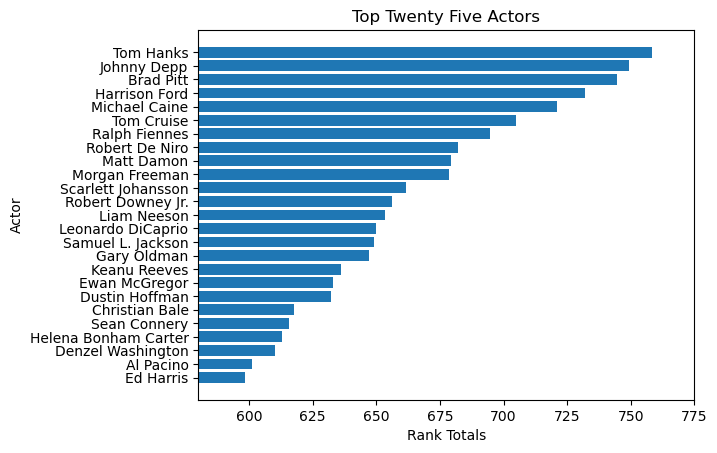

In [217]:
# Creating a horizontal bar chart with rank totals for the top 25 actors
# Sorting by rank total so the chart will show actors in order from rank 1-25
df_t = df_t.sort_values(by=['rank_totals'])
# Horizontal bar chart using matplotlib
plt.barh(df_t.actor, df_t.rank_totals, align='center')
# Bar chart title
plt.title('Top Twenty Five Actors')
# X axis label
plt.xlabel('Rank Totals')
# Y axis label
plt.ylabel('Actor')
# Limiting X axis to only show range of rank totals
plt.xlim([580, 775])
plt.show()

The bar chart above shows the top actors based on total ranking that includes total movie revenue, IMDB movie popularity mean and movie voting averages.  

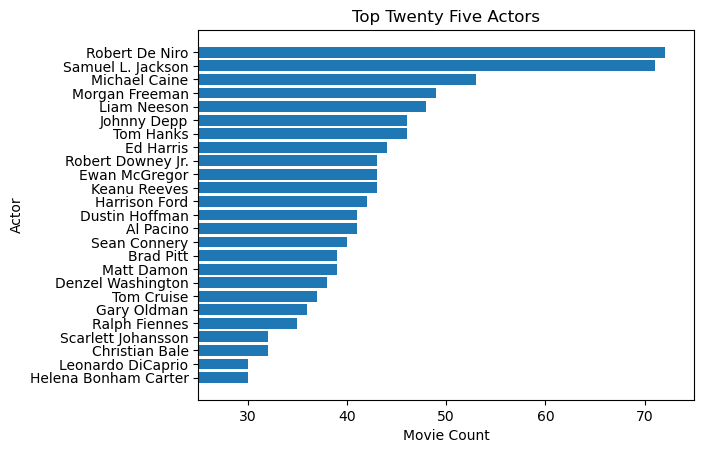

In [218]:
# Creating a horizontal bar chart with the movie count for the top 25 actors
# Sorting by movie count so the chart will show actors in order from rank 1-25
df_t = df_t.sort_values(by=['movie_count'])
# Horizontal bar chart using matplotlib
plt.barh(df_t.actor, df_t.movie_count, align='center')
# Bar chart title
plt.title('Top Twenty Five Actors')
# X axis label
plt.xlabel('Movie Count')
# Y axis label
plt.ylabel('Actor')
# Limiting X axis to only show range of movie count
plt.xlim([25, 75])
plt.show()

The bar chart above shows the top actors based on movie count. Actors such as Robert De Niro have a much higher movie count because they have been acting for a longer period of time. This does not accurately indicate popularity alone.

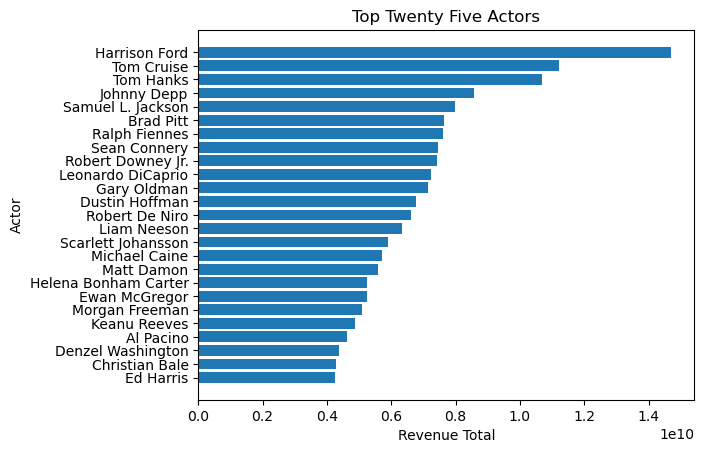

In [219]:
# Creating a horizontal bar chart with the revenue totals for the top 25 actors
# Sorting by movie count so the chart will show actors in order from rank 1-25
df_t = df_t.sort_values(by=['revenue_total'])
# Horizontal bar chart using matplotlib
plt.barh(df_t.actor, df_t.revenue_total, align='center')
# Bar chart title
plt.title('Top Twenty Five Actors')
# X axis label
plt.xlabel('Revenue Total')
# Y axis label
plt.ylabel('Actor')
plt.show()

The bar chart above shows the top actors based on Movie revenue totals. Actors that have starring in more movies will have more total Movie revenue so this does not accurately indicated popularity alone.

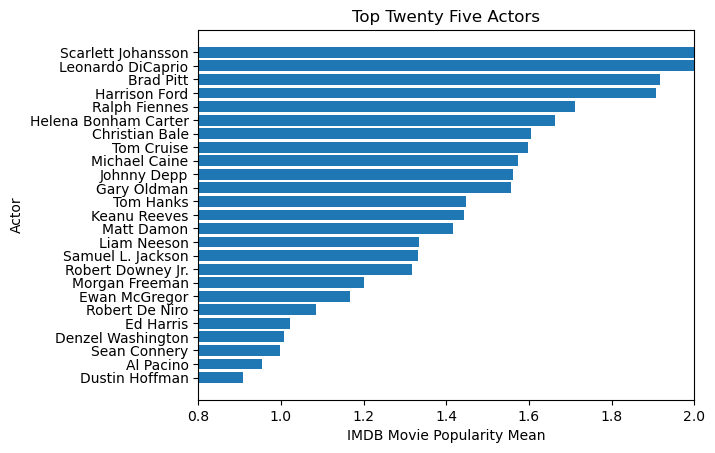

In [220]:
# Creating a horizontal bar chart with the IMDB popularity mean for the top 25 actors
# Sorting by movie count so the chart will show actors in order from rank 1-25
df_t = df_t.sort_values(by=['popularity_mean'])
# Horizontal bar chart using matplotlib
plt.barh(df_t.actor, df_t.popularity_mean, align='center')
# Bar chart title
plt.title('Top Twenty Five Actors')
# X axis label
plt.xlabel('IMDB Movie Popularity Mean')
# Y axis label
plt.ylabel('Actor')
# Limiting X axis to only show range of IMDB popularity mean
plt.xlim([0.8, 2])
plt.show()

The bar chart above shows the top actors based on IMDB movie popularity scores. Actors that have starred in less movies may have a higher popularity mean so this does not accurately indicated popularity alone.

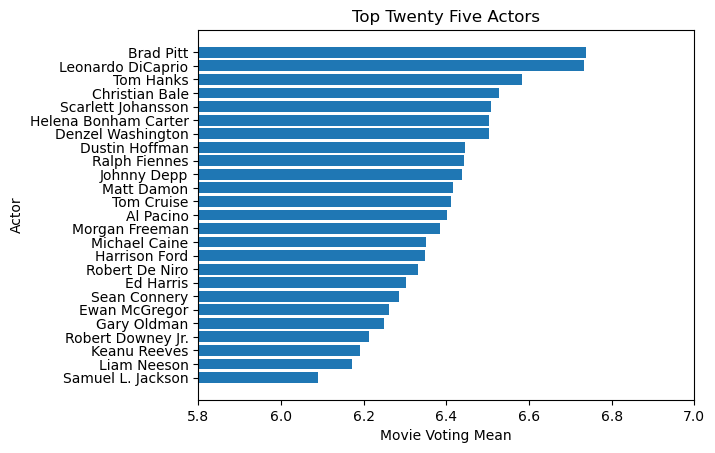

In [221]:
# Creating a horizontal bar chart with the Movie vote average for the top 25 actors
# Sorting by movie count so the chart will show actors in order from rank 1-25
df_t = df_t.sort_values(by=['vote_mean'])
# Horizontal bar chart using matplotlib
plt.barh(df_t.actor, df_t.vote_mean, align='center')
# Bar chart title
plt.title('Top Twenty Five Actors')
# X axis label
plt.xlabel('Movie Voting Mean')
# Y axis label
plt.ylabel('Actor')
# Limiting X axis to only show range of vote average
plt.xlim([5.8, 7])
plt.show()

The bar chart above shows the top actors based on movie voting averages. Actors that have starred in less movies may have a higher voting average so this does not accurately indicated popularity alone.

<a id='conclusions'></a>
## Conclusions
* Top 25 actors:
1. Tom Hanks
1. Johnny Depp
1. Brad Pitt
1. Harrison Ford
1. Michael Caine
1. Tom Cruise
1. Ralph Fiennes
1. Robert De Niro
1. Matt Damon
1. Morgan Freeman
1. Scarlett Johansson
1. Robert Downey Jr.
1. Liam Neeson
1. Leonardo DiCaprio
1. Samuel L. Jackson
1. Gary Oldman
1. Keanu Reeves
1. Ewan McGregor
1. Dustin Hoffman
1. Christian Bale
1. Sean Connery
1. Helena Bonham Carter
1. Denzel Washington
1. Al Pacino
1. Ed Harris

These are the top actors based on the number of movies they were in, the total revenue or the movies, IMDB popularity and voting average. 

These results are based on the movies the actors starred in and not the popularity of the actors themselves.